## <div align='center'>第7章 主成分分析、因子分析与典型相关分析</div>


### 内容
 <div align='left'>                  
     <font color='steelblue' size=4>
       7.1 主成分分析<br>
       7.2 因子分析<br>
       7.3 典型相关分析<br>
         </font>
       </div>

---------------------------------------

## 7.1 主成分分析

## 7.1.1  主成分分析过程 
- #### 概念
主成分分析(principal component analysis)将多个指标转化为少数几个综合指标的一种统计分析方法，主要通过降维技术实现。
- #### 主成分定义
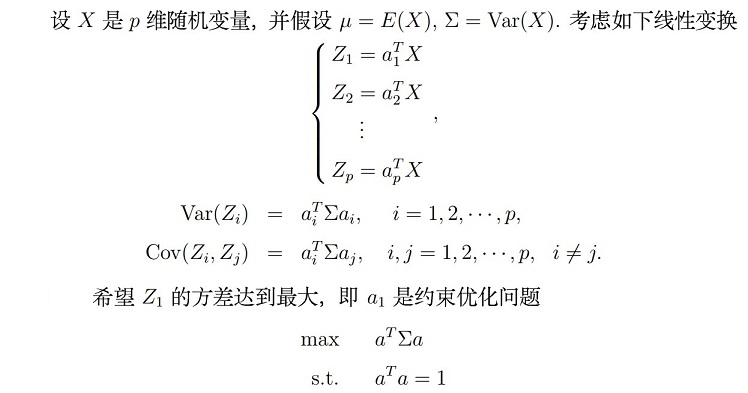
注意：约束条件$\alpha^T\alpha=1$对系数进行单位化转换，其实就是归一化转换。这样便于统一比较$\alpha$方差的值。
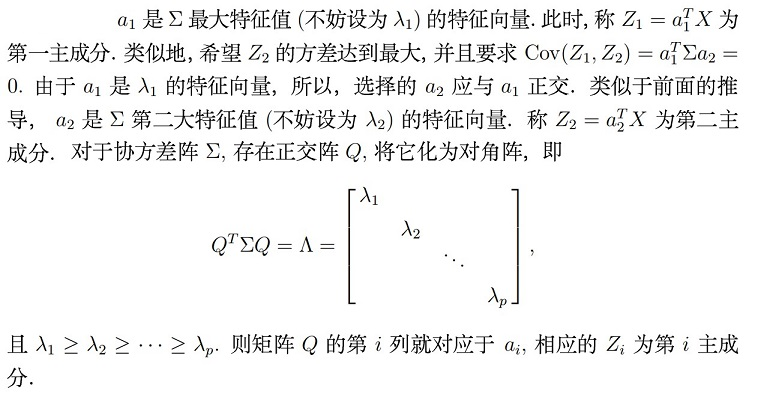

- #### 主成分的性质

##### 主成分依赖于数据X的协方差矩阵：
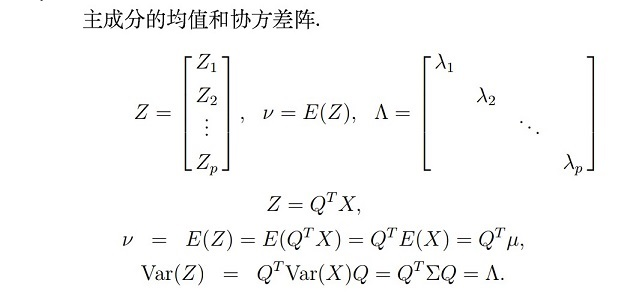

##### 主成分的总方差：
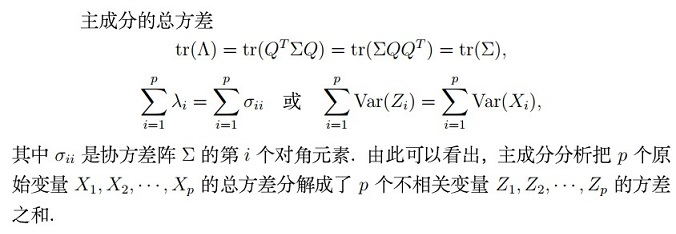

##### 原始变量对主成分的影响：
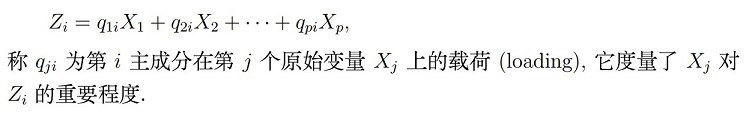




#### 例1：
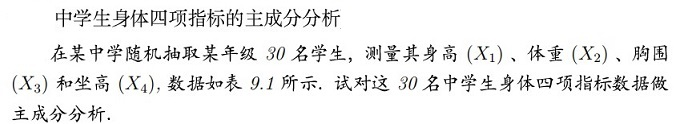
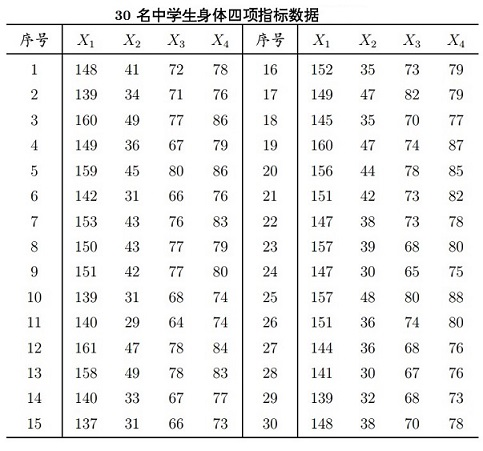

In [1]:
'''
  主成分分析
'''
%reset -f
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
#身高
x1=np.array([148, 139, 160, 149, 159, 142, 153, 150, 151, 139, 
        140, 161, 158, 140, 137, 152, 149, 145, 160, 156, 
        151, 147, 157, 147, 157, 151, 144, 141, 139, 148]) 
#体重
x2=np.array([41, 34, 49, 36, 45, 31, 43, 43, 42, 31, 
        29, 47, 49, 33, 31, 35, 47, 35, 47, 44,
        42, 38, 39, 30, 48, 36, 36, 30, 32, 38])
#胸围
x3=np.array([72, 71, 77, 67, 80, 66, 76, 77, 77, 68, 
        64, 78, 78, 67, 66, 73, 82, 70, 74, 78, 
        73, 73, 68, 65, 80, 74, 68, 67, 68, 70])
#坐高
x4=np.array([78, 76, 86, 79, 86, 76, 83, 79, 80, 74, 
        74, 84, 83, 77, 73, 79, 79, 77, 87, 85, 
        82, 78, 80, 75, 88, 80, 76, 76, 73, 78])
X = pd.DataFrame(np.array((x1,x2,x3,x4)).T,columns=['x1','x2','x3','x4'])

###样本数据的协方差矩阵,
#注意np.cov默认是无偏估计，即=np.cov(X.T,ddof=1)
S = np.cov(X.T)
###样本输的相关系数矩阵
rho = np.corrcoef(X.T)
###求相关系数矩阵的特征值及其特征向量
eig,eigv = np.linalg.eigh(rho)
eig,eigv

(array([0.06610989, 0.07940895, 0.31338316, 3.541098  ]),
 array([[-0.50574706,  0.44962709,  0.54321279, -0.49696605],
        [ 0.69084365,  0.46233003, -0.2102455 , -0.51457053],
        [-0.46148842, -0.17517651, -0.7246214 , -0.48090067],
        [ 0.2323433 , -0.74390834,  0.36829406, -0.50692846]]))

In [2]:
'''
主成分分析结果:
(1) 主成分标准差
(2) 主成分贡献率(方差比例)
(3) 主成分累积贡献率(方差累积比例)
(4) 主成分载荷
'''
print('各主成分的重要性：')
print('           Comp.1             Comp.2             Comp.3            Comp.4')
eig1=eig[::-1]
eigv1=eigv[:,::-1]
com_std=eig1**0.5
com_prop=eig1/np.sum(eig1)
com_cumprop=np.cumsum(eig1)/np.sum(eig1)
print('标准差      %0.8f         %0.8f         %0.8f       %0.8f'
      %(com_std[0],com_std[1],com_std[2],com_std[3]))
print('贡献率      %0.8f         %0.8f         %0.8f       %0.8f'
      %(com_prop[0],com_prop[1],com_prop[2],com_prop[3]))
print('累积贡献率   %0.8f         %0.8f         %0.8f       %0.8f'
      %(com_cumprop[0],com_cumprop[1],com_cumprop[2],com_cumprop[3]))
print('\n载荷：')

print('        Comp.1        Comp.2        Comp.3      Comp.4')

print('X1      %0.3f        %0.3f         %0.3f      %0.3f'%
      (eigv1[0,0],eigv1[0,1],eigv1[0,2],eigv1[0,3]))
print('X2      %0.3f       %0.3f         %0.3f       %0.3f'%
      (eigv1[1,0],eigv1[1,1],eigv1[1,2],eigv1[1,3]))
print('X3      %0.3f       %0.3f        %0.3f      %0.3f'%
      (eigv1[2,0],eigv1[2,1],eigv1[2,2],eigv1[2,3]))
print('X4      %0.3f        %0.3f        %0.3f       %0.3f'%
      (eigv1[3,0],eigv1[3,1],eigv1[3,2],eigv1[3,3]))

各主成分的重要性：
           Comp.1             Comp.2             Comp.3            Comp.4
标准差      1.88178054         0.55980636         0.28179594       0.25711844
贡献率      0.88527450         0.07834579         0.01985224       0.01652747
累积贡献率   0.88527450         0.96362029         0.98347253       1.00000000

载荷：
        Comp.1        Comp.2        Comp.3      Comp.4
X1      -0.497        0.543         0.450      -0.506
X2      -0.515       -0.210         0.462       0.691
X3      -0.481       -0.725        -0.175      -0.461
X4      -0.507        0.368        -0.744       0.232


##### 前两个主成分累积贡献率达到96%，剩下两个主成分可以舍去，进而达到降维的目的：
$Z^*_1= -0.497X^*_1-0.515X^*_2-0.481X^*_3-0.507X^*_4$

$Z^*_2= 0.543X^*_1-0.210X^*_2-0.725X^*_3+0.368X^*_4$

In [3]:
'''
使用statsmodels的PCA类进行主成分分析，结果与上面一致。
PCA使用的是协方差矩阵，上面使用的是相关系数矩阵。
相关系数矩阵本身就是协方差矩阵标准化的结果，二者是统一的。
下面代码显示PCA的主要计算结果。
'''
pc = sm.PCA(X,method='eig')
print('\ncoeff------\n',pc.coeff)
print('\neigenvals------\n',pc.eigenvals)
print('\neigenvecs------\n',pc.eigenvecs)
print('\nloadings------\n',pc.loadings)
print('\nfactors------\n',pc.factors)
#print('\nic------\n',pc.ic)

#print('projection------\n',pc.projection)
print('\nrsquare------\n',pc.rsquare)


coeff------
               x1        x2        x3        x4
comp_0 -5.122198 -5.303646 -4.956613 -5.224879
comp_1  1.665591 -0.644652 -2.221824  1.129258
comp_2  0.693981  0.713588 -0.270378 -1.148193
comp_3 -0.712241  0.972912 -0.649912  0.327208

eigenvals------
 0    106.232940
1      9.401495
2      2.382269
3      1.983297
Name: eigenvals, dtype: float64

eigenvecs------
    eigenvec_0  eigenvec_1  eigenvec_2  eigenvec_3
0   -0.496966    0.543213    0.449627   -0.505747
1   -0.514571   -0.210246    0.462330    0.690844
2   -0.480901   -0.724621   -0.175177   -0.461488
3   -0.506928    0.368294   -0.743908    0.232343

loadings------
       comp_0    comp_1    comp_2    comp_3
x1 -0.496966  0.543213  0.449627 -0.505747
x2 -0.514571 -0.210246  0.462330  0.690844
x3 -0.480901 -0.724621 -0.175177 -0.461488
x4 -0.506928  0.368294 -0.743908  0.232343

factors------
       comp_0    comp_1    comp_2    comp_3
0   0.006783 -0.077666  0.230063  0.188966
1   0.154776 -0.234322 -0.212595  0

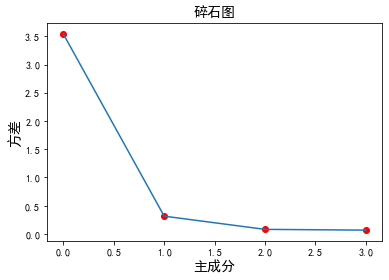

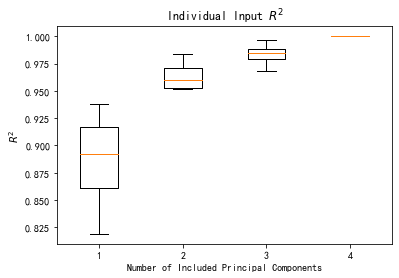

In [4]:
###碎石图与R方图
plt.scatter(range(len(eig1)),eig1,c='red')
plt.plot(range(len(eig1)),eig1)
plt.xlabel('主成分',size=14)
plt.ylabel('方差',size=14)
plt.title('碎石图',size=14)
pc.plot_rsquare()
plt.show()

In [5]:
'''
主成分值：
(1) 首先对观测变量进行标准化，即用(X的列向量-每列均值)/每列的标准差。
(2) 然后用标准化后的X与因子载荷求点积，即可得出主成分值。
'''
X_std=(X-np.mean(X,axis=0))/np.std(X,axis=0)
princs = X_std@pc.loadings
princs.columns=(['主成分1','主成分2','主成分3','主成分4'])
princs

,主成分1,主成分2,主成分3,主成分4
0,0.069909,-0.238137,0.355092,0.266120
1,1.595263,-0.718474,-0.328132,0.118057
2,-2.847932,0.389567,0.097317,0.279482
3,0.759970,0.806043,0.049457,0.162949
4,-2.739668,0.017181,-0.360126,-0.358653
5,2.105832,0.322844,-0.186004,0.036456
6,-1.421056,-0.060532,-0.210933,0.044223
7,-0.825840,-0.781026,0.275578,-0.057289
8,-0.934644,-0.584692,0.088141,-0.181038
9,2.364638,-0.365322,-0.088405,-0.045520


In [6]:
###factors的计算方法
np.array(princs)/np.array(pc.eigenvals**.5)

array([[ 0.00678276, -0.07766555,  0.23006264,  0.1889661 ],
       [ 0.15477571, -0.23432175, -0.21259529,  0.08382944],
       [-0.27631212,  0.12705257,  0.0630514 ,  0.19845441],
       [ 0.07373383,  0.26288145,  0.03204309,  0.11570674],
       [-0.26580815,  0.00560334, -0.23332394, -0.25467169],
       [ 0.20431208,  0.10529171, -0.12051121,  0.02588667],
       [-0.13787374, -0.01974168, -0.13666257,  0.03140185],
       [-0.08012466, -0.25472226,  0.1785456 , -0.04067936],
       [-0.09068107, -0.19069048,  0.05710635, -0.12855095],
       [ 0.22942202, -0.11914542, -0.057277  , -0.03232285],
       [ 0.27529219,  0.11374341, -0.02144807,  0.02211675],
       [-0.25308318,  0.06939804,  0.21638421, -0.1492283 ],
       [-0.23697957, -0.05469172,  0.30398   ,  0.1157341 ],
       [ 0.18107288,  0.01637665, -0.24438781,  0.2547916 ],
       [ 0.27296901, -0.10367965,  0.02132436,  0.15766228],
       [ 0.0062026 ,  0.06757075, -0.02808197, -0.49956385],
       [-0.15092848, -0.

#### 7.1.2  主成分回归

#### 例2：
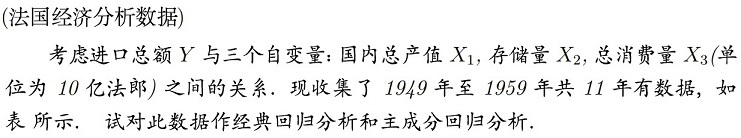
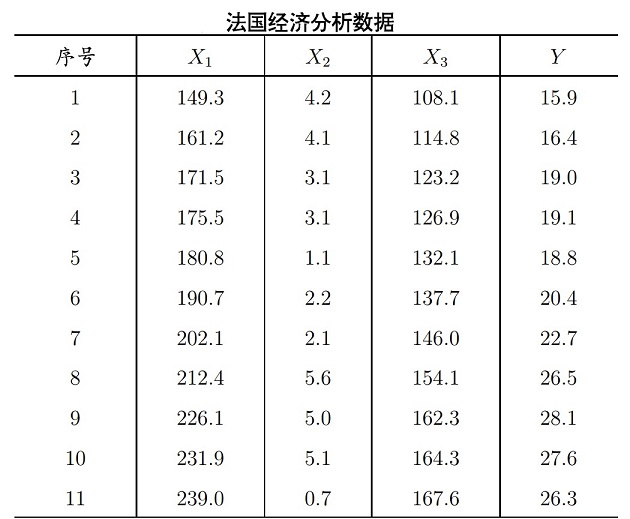

In [7]:
'''
主成分回归  
'''

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st
x1=np.array([149.3, 161.2, 171.5, 175.5, 180.8, 190.7,
             202.1, 212.4, 226.1, 231.9, 239.0])
x2=np.array([4.2, 4.1, 3.1, 3.1, 1.1, 2.2, 2.1, 5.6, 
             5.0, 5.1, 0.7])
x3=np.array([108.1, 114.8, 123.2, 126.9, 132.1, 137.7,  
             146.0, 154.1, 162.3, 164.3, 167.6])
y =np.array([15.9, 16.4, 19.0, 19.1, 18.8, 20.4, 22.7, 
             26.5, 28.1, 27.6, 26.3])
formula = 'y~x1+x2+x3'
result1 = smf.ols(formula,data={'x1':x1,'x2':x2,'x3':x3,'y':y}).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     285.6
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           1.11e-07
Time:                        08:08:13   Log-Likelihood:                -5.2501
No. Observations:                  11   AIC:                             18.50
Df Residuals:                       7   BIC:                             20.09
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.1280      1.212     -8.355      0.0

f:\users\hp\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


#### 结果解析：
- 首先，从模型结果可以看出，$X_1$的系数不显著，因为p值为0.488，远大于0.05，不符合常识，因为国内生产总值和进口量应该存在关联关系。

- 其次，从回归方程看，$Y$是进口量，$X_1$是国内生产总值。但是$X_1$的系数为负数，即国内生产总值越高，进口量越小，也不符合实际情况。

- 最后，条件数的平方远大于1000，说明模型存在严重多重共线性情况。

In [8]:
'''
主成分回归分析
转而进行主成分回归，首先计算主成分
通过前2个主成分进行回归分析，可以看出模型的各项统计量都很理想。
'''
economy = pd.DataFrame(np.c_[x1,x2,x3])
economy_pr = sm.PCA(economy, method='eig')
eco_eigv = economy_pr.eigenvecs

###对样本数据进行标准化
stdEco=(economy-np.mean(economy,axis=0))/np.std(economy,axis=0)
###计算各样本的主成分值
pred_economy = np.dot(np.matrix(stdEco),eco_eigv)
###使用前2个主成分构造回归分析模型
formula2 = 'y~z1+z2'#根据主成分构造回归分析公式
result2 = smf.ols(formula2,data = {'z1':pred_economy[:,0],'z2':pred_economy[:,1]}).fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     337.2
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           1.89e-08
Time:                        08:08:13   Log-Likelihood:                -7.2807
No. Observations:                  11   AIC:                             20.56
Df Residuals:                       8   BIC:                             21.76
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.8909      0.166    132.006      0.0

f:\users\hp\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


- 主成分回归方程：

$Y=21.8909-2.9892Z^*_1-0.8288Z^*_2$

- #### 从主成分回归方程转换成原变量系数的回归方程：

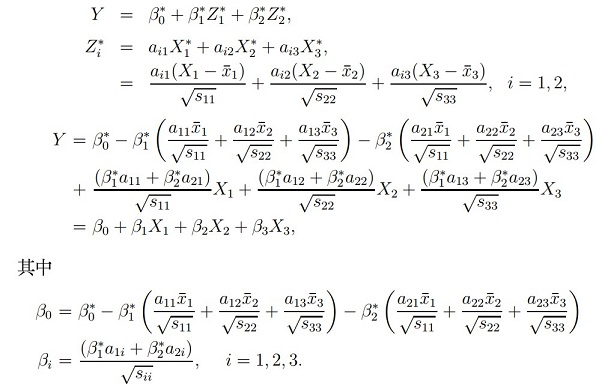

In [9]:
'''
转换成原始数据的回归系数（包括截距）
'''
#原始数据的标准差
std_x = np.std(economy,axis=0)
#原始数据的均值
mean_x = np.mean(economy,axis=0)
#根据主成分（前两个主成分）进行回归分析得到的回归系数
beta = result2.params
#主成分的载荷，也就是对应的特征向量
A = np.array(economy_pr.loadings)
#回归系数
coef = np.array((beta[1]*A[:,0] + beta[2]*A[:,1])/std_x)
#截距项
intercept = beta[0] - np.sum(mean_x*coef)
#经转换后的原变量回归方程
print('Y = %f + %fX1 + %fX2 + %fX3'%(intercept,coef[0],coef[1],coef[2]))

Y = -9.130108 + 0.072780X1 + 0.609220X2 + 0.106259X3


#### 结果解析
- 主成分回归分析的结果都很理想，可以转换成原变量的回归方程。

- 3个观测变量的系数都为正，比较符合实际情况。

- 原变量回归方程：$Y=-9.130108 + 0.072780X_1 + 0.609220X_2 + 0.106259X_3$


-------------

## 7.2 因子分析

- #### factor analysis
用来分析隐藏在表面现象背后的因子作用的一种统计模型。
- #### 研究对象
数据的相关系数矩阵或方差/协方差矩阵，将多个变量综合为少数几个因子，从而再现原始变量与因子之间的关系。
- #### 基本原理：
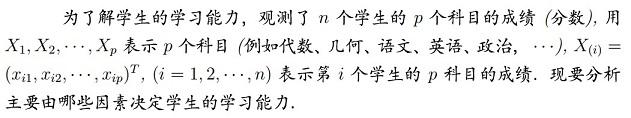
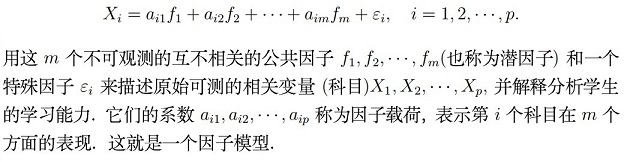

- #### 类型：
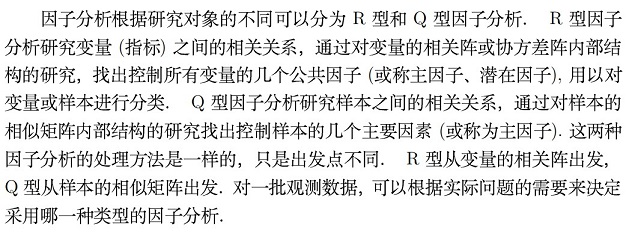

### 7.2.1 因子模型

- #### 数学模型：

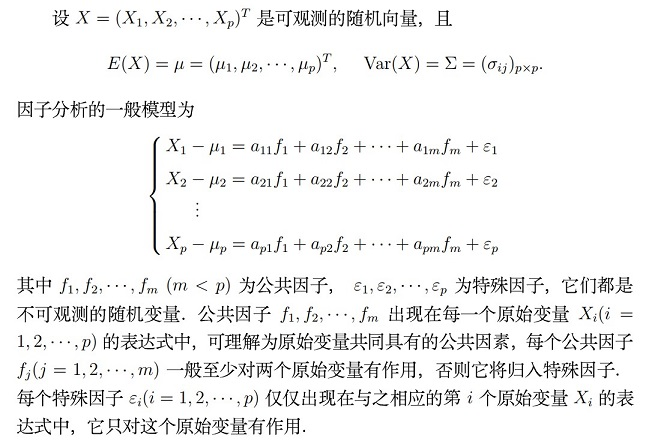

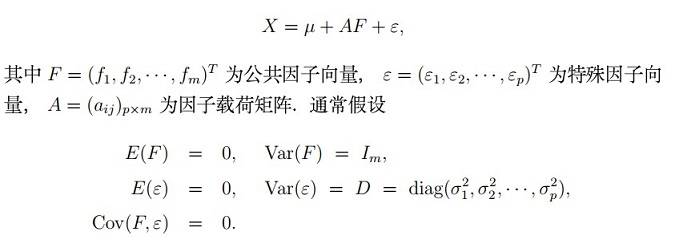

- #### 性质：
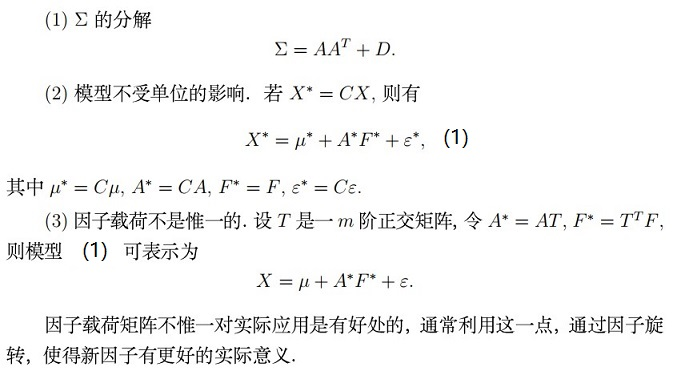

- #### 因子载荷矩阵的统计意义：

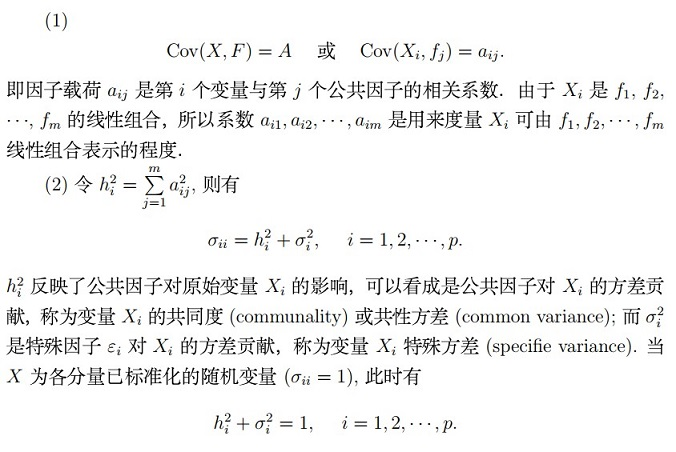

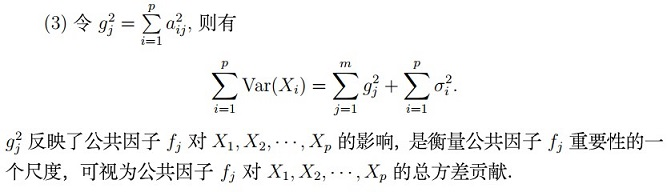


### 7.2.2 参数估计
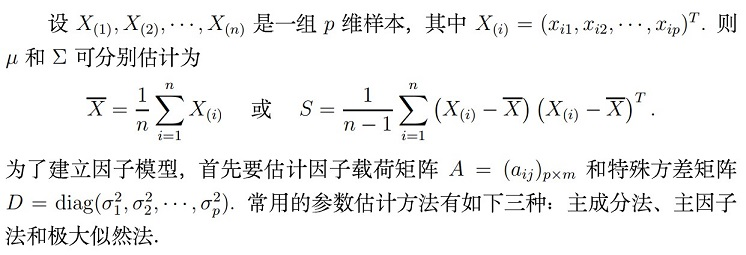

#### (1)  主成分法

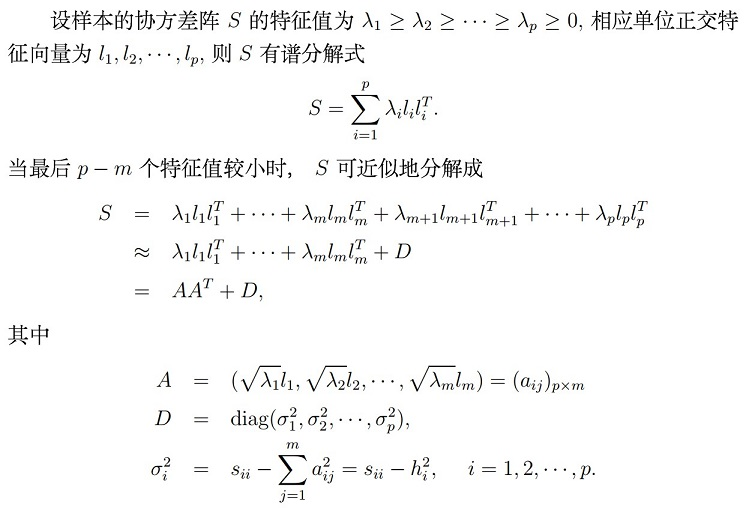
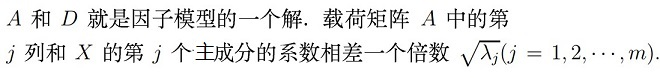

In [10]:
'''
主成分法实现代码。
函数参数：
(1) S: 样本的相关系数或协方差矩阵，一般用相关系数矩阵。
(2) m: 主成分的个数，或因子个数。
'''
import numpy as np
import pandas as pd
from collections import namedtuple
def factorAnalByPC(S,m):
    ###相关系数的行数，S是对称方阵，行数=列数。
    p = S.shape[0]
    ###结果数据的行名
    rowNamesA = ['X'+ str(i+1) for i in np.arange(0,p)]
    ###结果数据的列名
    colNames = ['Factor' + str(i+1) for i in np.arange(0,m)]
    
    ###生成形状(p,m)的矩阵
    A = np.zeros((p,m))
    ###相关系数矩阵的对角线元素
    diagS = np.diag(S)
    ###相关系数矩阵的对角线元素之和
    sRank = np.sum(diagS)
    
    ###相关系数矩阵的特征值与特征向量
    #注意S是对称矩阵，可使用eigh函数求解
    #如果不是对称矩阵，需使用eig函数
    eig,eigv = np.linalg.eigh(S)
    ###注意eig的值是从小到大排序
    #将其排序逆反过来，特征向量按列逆反顺序
    eig = eig[::-1]
    eigv = eigv[:,::-1]
    
    ###每个自变量的因子载荷=特征值的平方根*相应特征向量
    #注意特征值和特征向量要对应
    for i in np.arange(0,m):
        A[:,i] = np.sqrt(eig[i])*eigv[:,i]        
    df_A = pd.DataFrame(A,columns = colNames,index =rowNamesA)
    
    ### h为公共因子平方的对角线元素
    #B保存三行数据：贡献、贡献比、累积贡献比
    h = np.diag(np.dot(A,A.T))
    B = np.zeros((3,m))
    for i in np.arange(0,m):
        B[0,i] = np.sum(A[:,i]**2)
        B[1,i] = B[0,i]/sRank
        B[2,i] = np.sum(B[0,0:i+1])/sRank
        
    ###DataFrame的列名和行名
    rowNamesB = np.array(['SS loadings','Proportion Var','Cumulative Var'])
    df_B = pd.DataFrame(B,columns = colNames,index=rowNamesB)
    var = pd.DataFrame(np.c_[h,diagS-h],columns = ['Common Factors','Specific Factor'],
                       index=rowNamesA)
    method = 'Principal Component Method'
    FactorAnalResults = namedtuple('FactorAnalResults','method loadings var B')
    faResults = FactorAnalResults(method,df_A,var,df_B)
    return faResults

#### 例3：
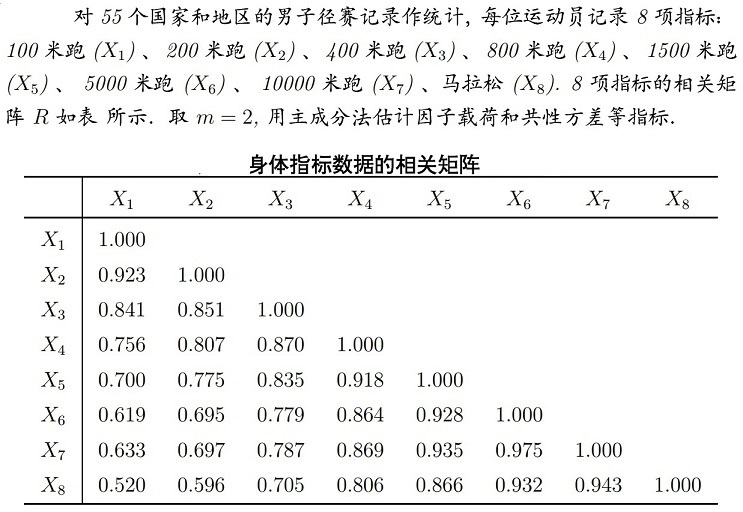

In [11]:
'''
例3代码
'''
###相关系数矩阵下三角
x = np.array([1.000, 
              0.923, 1.000,
              0.841, 0.851, 1.000,  
              0.756, 0.807, 0.870, 1.000, 
              0.700, 0.775, 0.835, 0.918, 1.000, 
              0.619, 0.695, 0.779, 0.864, 0.928, 1.000, 
              0.633, 0.697, 0.787, 0.869, 0.935, 0.975, 1.000, 
              0.520, 0.596, 0.705, 0.806, 0.866, 0.932, 0.943, 1.000])

###观测变量相关系数矩阵完整数据，注意对称性
R = np.array([1.000, 0.923, 0.841, 0.756, 0.700, 0.619, 0.633, 0.520,
              0.923, 1.000, 0.851, 0.807, 0.775, 0.695, 0.697, 0.596,
              0.841, 0.851, 1.000, 0.870, 0.835, 0.779, 0.787, 0.705,
              0.756, 0.807, 0.870, 1.000, 0.918, 0.864, 0.869, 0.806,
              0.700, 0.775, 0.835, 0.918, 1.000, 0.928, 0.935, 0.866,
              0.619, 0.695, 0.779, 0.864, 0.928, 1.000, 0.975, 0.932,
              0.633, 0.697, 0.787, 0.869, 0.935, 0.975, 1.000, 0.943,
              0.520, 0.596, 0.705, 0.806, 0.866, 0.932, 0.943, 1.000]).reshape(8,8)

###设置2个因子
fa = factorAnalByPC(R,m=2)
print('因子载荷：\n',fa.loadings,'\n')
print('因子方差：\n',fa.var,'\n')
print('因子贡献：\n',fa.B)

'''
误差平方和：
注意这里的np.diag是要构造一个对角线矩阵，而不是取出矩阵的对角线。
np.diag函数的参数如果是一个一维数组那么生成对角线矩阵。
如果参数是一个矩阵，就取得对角线元素。
此处是生成对角线矩阵。
'''
sse = np.sum(np.array(((R-fa.loadings@fa.loadings.T)-np.diag(np.array(fa.var)[:,1]))**2))
print('\n主成分法误差平方和：',sse)

因子载荷：
      Factor1   Factor2
X1 -0.817170  0.531095
X2 -0.867287  0.432713
X3 -0.915167  0.232513
X4 -0.948741  0.011848
X5 -0.959376 -0.131475
X6 -0.937663 -0.292677
X7 -0.943974 -0.287076
X8 -0.879809 -0.411172 

因子方差：
     Common Factors  Specific Factor
X1        0.949829         0.050171
X2        0.939427         0.060573
X3        0.891593         0.108407
X4        0.900250         0.099750
X5        0.937688         0.062312
X6        0.964872         0.035128
X7        0.973499         0.026501
X8        0.943125         0.056875 

因子贡献：
                  Factor1   Factor2
SS loadings     6.622358  0.877926
Proportion Var  0.827795  0.109741
Cumulative Var  0.827795  0.937536

主成分法误差平方和： 0.017400228597248928


In [12]:
np.array(fa.var)[:,1],np.diag(np.array(fa.var)[:,1])
(R-fa.loadings@fa.loadings.T)-np.diag(np.array(fa.var)[:,1])

,X1,X2,X3,X4,X5,X6,X7,X8
X1,0.000000,-0.015533,-0.030334,-0.025575,-0.014148,0.008209,0.014078,0.019418
X2,-0.015533,0.000000,-0.043324,-0.020958,-0.000163,0.008422,0.002526,0.010873
X3,-0.030334,-0.043324,0.000000,-0.001012,-0.012420,-0.011067,-0.010145,-0.004569
X4,-0.025575,-0.020958,-0.001012,0.000000,0.009358,-0.022132,-0.023185,-0.023839
X5,-0.014148,-0.000163,-0.012420,0.009358,0.000000,-0.010051,-0.008369,-0.032126
X6,0.008209,0.008422,-0.011067,-0.022132,-0.010051,0.000000,0.005850,-0.013304
X7,0.014078,0.002526,-0.010145,-0.023185,-0.008369,0.005850,0.000000,-0.005554
X8,0.019418,0.010873,-0.004569,-0.023839,-0.032126,-0.013304,-0.005554,0.000000


In [13]:
sse = np.sum(np.array(((R-fa.loadings@fa.loadings.T)-np.diag(np.array(fa.var)[:,1]))**2))
print('\n主成分法误差平方和：',sse)


主成分法误差平方和： 0.017400228597248928


In [14]:
fa.loadings

,Factor1,Factor2
X1,-0.817170,0.531095
X2,-0.867287,0.432713
X3,-0.915167,0.232513
X4,-0.948741,0.011848
X5,-0.959376,-0.131475
X6,-0.937663,-0.292677
X7,-0.943974,-0.287076
X8,-0.879809,-0.411172


#### (2) 主因子法
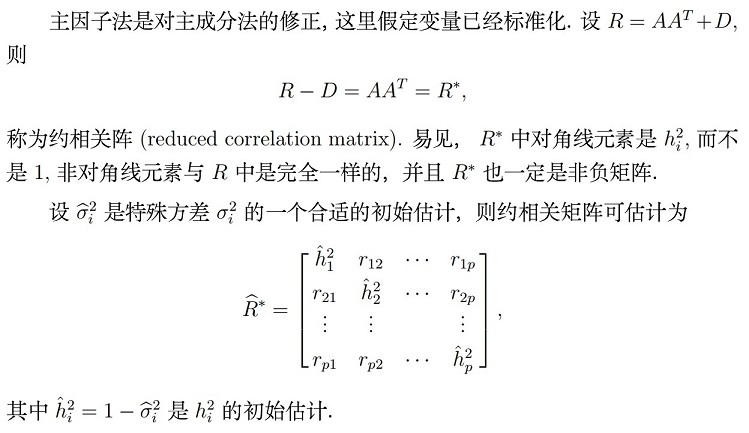
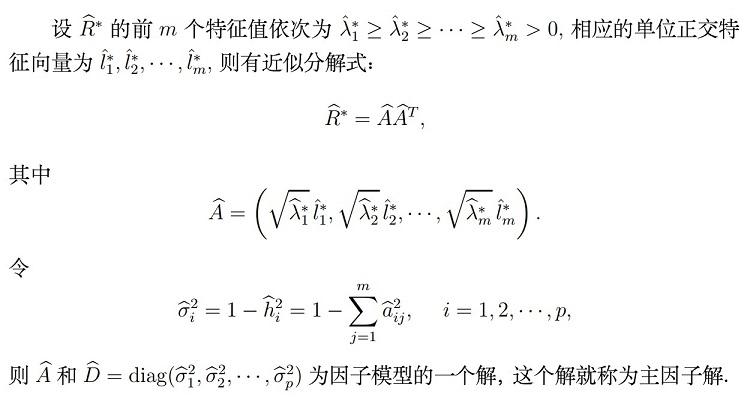

In [15]:
#主因子法，StatsModels的Factor里的主成分法就是用的这种方法进行参数估计
import numpy as np
import pandas as pd
from collections import namedtuple
def factorAnalByPF(S,m,d):
    p = S.shape[0]
    rowNamesA = ['X'+ str(i+1) for i in np.arange(0,p)]
    colNames = ['Factor' + str(i+1) for i in np.arange(0,m)]
    A = np.zeros((p,m))
    diagS = np.diag(S)
    sRank = np.sum(diagS)
    
    ###h矩阵的计算，用相关系数的矩阵对角线元素减去d的初始值
    h = diagS - d
    ###迭代次数
    iterNum = 200
    k = 1
    while 1==1:
        ###与主成分法的区别就在于相关系数矩阵对角线不是1，而是h[i]
        for i in np.arange(0,S.shape[0]):
            S[i,i] = h[i]
        
        h1 = h
        eig,eigv = np.linalg.eigh(S)
        eig = eig[::-1]
        eigv = eigv[:,::-1]
        for i in np.arange(0,m):
            A[:,i] = np.sqrt(eig[i])*eigv[:,i]
        h = np.diag(np.dot(A,A.T))
        
        ### 迭代停止判定
        #当新h与老h差的平方和小于1e-8，或迭代次数超过限定便停止迭代
        if np.sqrt(np.sum((h-h1)**2))<1e-8 or k==iterNum:
            break
        k = k+1
        
    df_A = pd.DataFrame(A,columns = colNames,index =rowNamesA)
    B = np.zeros((3,m))
    for i in np.arange(0,m):
        B[0,i] = np.sum(A[:,i]**2)
        B[1,i] = B[0,i]/sRank
        B[2,i] = np.sum(B[0,0:i+1])/sRank
    rowNamesB = np.array(['SS loadings','Proportion Var','Cumulative Var'])
    df_B = pd.DataFrame(B,columns = colNames,index=rowNamesB)
    var = pd.DataFrame(np.c_[h,diagS-h],columns = ['Common Factors','Specific Factor'],
                       index=rowNamesA)
    method = 'Principal Factor Method'
    FactorAnalResults = namedtuple('FactorAnalResults','method loadings var B iter')
    faResults = FactorAnalResults(method,df_A,var,df_B,k)
    return faResults

In [16]:
###继续使用例3进行因子分析
R = np.array([1.000, 0.923, 0.841, 0.756, 0.700, 0.619, 0.633, 0.520,
              0.923, 1.000, 0.851, 0.807, 0.775, 0.695, 0.697, 0.596,
              0.841, 0.851, 1.000, 0.870, 0.835, 0.779, 0.787, 0.705,
              0.756, 0.807, 0.870, 1.000, 0.918, 0.864, 0.869, 0.806,
              0.700, 0.775, 0.835, 0.918, 1.000, 0.928, 0.935, 0.866,
              0.619, 0.695, 0.779, 0.864, 0.928, 1.000, 0.975, 0.932,
              0.633, 0.697, 0.787, 0.869, 0.935, 0.975, 1.000, 0.943,
              0.520, 0.596, 0.705, 0.806, 0.866, 0.932, 0.943, 1.000]).reshape(8,8)

###d矩阵是相关系数矩阵逆矩阵对角线元素的倒数。
d = 1/np.diag(np.linalg.inv(R))
fa = factorAnalByPF(R,2,d)
print('因子载荷:\n',fa.loadings)
print('\n因子贡献:\n',fa.B)
print('\n迭代次数:\n',fa.iter)

###共性方差的计算=diag(loadings@loadings.T)，
#即载荷矩阵与载荷矩阵转置的点积之对角线元素。
print('\n因子共性方差：',np.diag(np.round(np.dot(fa.loadings,fa.loadings.T),4)))

###误差平方和
#通过误差平方和的比较可以看出，主因子法优于主成分法
sse = np.sum(np.array(((R-fa.loadings@fa.loadings.T)-np.diag(np.array(fa.var)[:,1]))**2))
print('\n主因子法误差平方和：',sse)

因子载荷:
      Factor1   Factor2
X1 -0.812384  0.514067
X2 -0.860976  0.415496
X3 -0.900501  0.210512
X4 -0.937045  0.017826
X5 -0.954538 -0.118699
X6 -0.938468 -0.286136
X7 -0.947094 -0.285869
X8 -0.872830 -0.376988

因子贡献:
                  Factor1   Factor2
SS loadings     6.540885  0.801339
Proportion Var  0.817611  0.100167
Cumulative Var  0.817611  0.917778

迭代次数:
 50

因子共性方差： [0.9242 0.9139 0.8552 0.8784 0.9252 0.9626 0.9787 0.904 ]

主因子法误差平方和： 0.005421870991759559


#### (3) 极大似然法
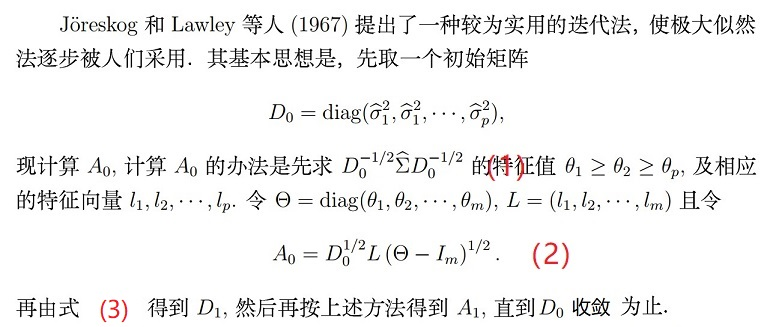
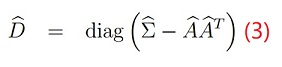

极大似然法的因子分析更详细推导过程可以参考：https://www.cnblogs.com/jerrylead/archive/2011/05/11/2043317.html


In [17]:
'''
因子分析--极大似然法
参数：
S:相关系数矩阵。
m:因子个数。
d:极大似然法参数估计的起始点，
  一般为相关系数矩阵逆矩阵对角线元素的倒数。
'''
import numpy as np
import pandas as pd
from collections import namedtuple
def factorAnalByML(S,m,d):
    p = S.shape[0]
    rowNamesA = ['X'+ str(i+1) for i in np.arange(0,p)]
    colNames = ['Factor' + str(i+1) for i in np.arange(0,m)]
    A = np.zeros((p,m))
    diagS = np.diag(S)
    sRank = np.sum(diagS)
    iterNum = 200
    k = 1
    while 1==1:
        d1 = d
        ###对参数估计的初始值开方求倒数。
        d2 = 1/np.sqrt(d)        
        
        ###公式（1）下述两种计算方法相同:
        #S*np.outer(d2,d2) 等于 np.dot(np.dot(np.diag(d2),S),np.diag(d2))
        #eig,eigv = np.linalg.eigh(S*np.outer(d2,d2))  
        #eig,eigv = np.linalg.eigh(np.dot(np.dot(np.diag(d2),S),np.diag(d2)))       
        eig,eigv = np.linalg.eigh(np.diag(d2)@S@np.diag(d2))      
        eig = eig[::-1]
        eigv = eigv[:,::-1]        
        for i in np.arange(0,m):
            ###公式(2)右半部分的计算
            #即：L(theta-Im)^(1/2)
            A[:,i] = eigv[:,i]*np.sqrt(eig[i]-1)
        
        ##公共因子，公式(2)的完整计算
        A =np.diag(np.sqrt(d))@A
        ##公式（3）
        d = np.diag(S - A@A.T)       
        ###迭代停止判定条件，D收敛或达到最大迭代次数
        if np.sqrt(np.sum((d-d1)**2))<1e-8 or k==iterNum:
            break
        k = k+1        
    df_A = pd.DataFrame(A,columns = colNames,index =rowNamesA)
    ##方差贡献
    B = np.zeros((3,m))
    for i in np.arange(0,m):
        B[0,i] = np.sum(A[:,i]**2)
        B[1,i] = B[0,i]/sRank
        B[2,i] = np.sum(B[0,0:i+1])/sRank
    rowNamesB = np.array(['SS loadings','Proportion Var','Cumulative Var'])
    df_B = pd.DataFrame(B,columns = colNames,index=rowNamesB)
    var = pd.DataFrame(np.c_[diagS-d,d],columns = ['Common Factors','Specific Factor'],
                       index=rowNamesA)
    method = 'Maximum Likelihood Method'
    FactorAnalResults = namedtuple('FactorAnalResults','method loadings var B iter')
    faResults = FactorAnalResults(method,df_A,var,df_B,k)
    return faResults

In [18]:
###公式(1)的2种计算方法
R = np.array([1.000, 0.923, 0.841, 0.756, 0.700, 0.619, 0.633, 0.520,
              0.923, 1.000, 0.851, 0.807, 0.775, 0.695, 0.697, 0.596,
              0.841, 0.851, 1.000, 0.870, 0.835, 0.779, 0.787, 0.705,
              0.756, 0.807, 0.870, 1.000, 0.918, 0.864, 0.869, 0.806,
              0.700, 0.775, 0.835, 0.918, 1.000, 0.928, 0.935, 0.866,
              0.619, 0.695, 0.779, 0.864, 0.928, 1.000, 0.975, 0.932,
              0.633, 0.697, 0.787, 0.869, 0.935, 0.975, 1.000, 0.943,
              0.520, 0.596, 0.705, 0.806, 0.866, 0.932, 0.943, 1.000]).reshape(8,8)
d = 1/np.diag(np.linalg.inv(R))
d1=1/np.sqrt(d)
d2=np.diag(d1)

###注意R*np.outer(d1,d1)是shape相同的两个矩阵逐元素相乘
(d2@R@d2)[0:2],(R*np.outer(d1,d1))[0:2,]


(array([[ 8.18594212,  7.9164833 ,  6.10555918,  6.33911965,  7.4187552 ,
          8.39120266, 10.00431805,  4.80390185],
        [ 7.9164833 ,  8.98654035,  6.47322852,  7.08994094,  8.60590668,
          9.87143512, 11.54193137,  5.76897917]]),
 array([[ 8.18594212,  7.9164833 ,  6.10555918,  6.33911965,  7.4187552 ,
          8.39120266, 10.00431805,  4.80390185],
        [ 7.9164833 ,  8.98654035,  6.47322852,  7.08994094,  8.60590668,
          9.87143512, 11.54193137,  5.76897917]]))

In [19]:
#极大似然法，仍使用例3的数据
R = np.array([1.000, 0.923, 0.841, 0.756, 0.700, 0.619, 0.633, 0.520,
              0.923, 1.000, 0.851, 0.807, 0.775, 0.695, 0.697, 0.596,
              0.841, 0.851, 1.000, 0.870, 0.835, 0.779, 0.787, 0.705,
              0.756, 0.807, 0.870, 1.000, 0.918, 0.864, 0.869, 0.806,
              0.700, 0.775, 0.835, 0.918, 1.000, 0.928, 0.935, 0.866,
              0.619, 0.695, 0.779, 0.864, 0.928, 1.000, 0.975, 0.932,
              0.633, 0.697, 0.787, 0.869, 0.935, 0.975, 1.000, 0.943,
              0.520, 0.596, 0.705, 0.806, 0.866, 0.932, 0.943, 1.000]).reshape(8,8)
d = 1/np.diag(np.linalg.inv(R))
fa = factorAnalByML(R,2,d)
print(fa.loadings)
print(fa.B)
print('iterative:',fa.iter)

###误差平方和
sse = np.sum(np.array(((R-fa.loadings@fa.loadings.T)-np.diag(np.array(fa.var)[:,1]))**2))
print('\n极大似然法误差平方和：',sse)

     Factor1   Factor2
X1 -0.730436  0.620772
X2 -0.791430  0.546605
X3 -0.854547  0.343414
X4 -0.915648  0.161645
X5 -0.957944  0.025939
X6 -0.972619 -0.143754
X7 -0.980883 -0.141935
X8 -0.922853 -0.248582
                 Factor1   Factor2
SS loadings     6.405994  0.931473
Proportion Var  0.800749  0.116434
Cumulative Var  0.800749  0.917183
iterative: 59

极大似然法误差平方和： 0.0067299222022644285


- #### 调用Statsmodels的Factor类方法

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Factor analysis results
============================================================
                 Eigenvalues                                
------------------------------------------------------------
  var0   var1   var2   var3    var4    var5    var6    var7 
------------------------------------------------------------
 6.5409 0.8013 0.0574 0.0137 -0.0041 -0.0072 -0.0240 -0.0359
------------------------------------------------------------
                                                            
------------------------------------------------------------
                 Communality                                
------------------------------------------------------------
      var0   var1   var2   var3   var4   var5   var6   var7 
------------------------------------------------------------
     0.9242 0.9139 0.8552 0.8784 0.9252 0.9626 0.9787 0.9040
------------------------------------------------------------
                                                            
------------------------------------------------------------
              Pre-rotated loadings                          
--------------------------------------------------------------------------------------------------
                                           factor 0                                       factor 1
--------------------------------------------------------------------------------------------------
var0                                         0.8124                                        -0.5141
var1                                         0.8610                                        -0.4155
var2                                         0.9005                                        -0.2105
var3                                         0.9370                                        -0.0178
var4                                         0.9545                                         0.1187
var5                                         0.9385                                         0.2861
var6                                         0.9471                                         0.2859
var7                                         0.8728                                         0.3770
------------------------------------------------------------
                                                            
============================================================

"""

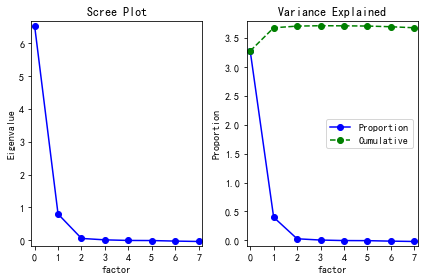

In [20]:
'''
调用Statsmodels的Factor类的fit方法--默认采用主因子法
'''
faResultsByPF = sm.Factor(n_factor=2,corr=R).fit()
faResultsByPF.plot_scree()
faResultsByPF.summary()

In [21]:
###共性方差的计算
np.sum(faResultsByPF.loadings**2,1)

array([0.9242327 , 0.91391659, 0.85521683, 0.87837202, 0.92523126,
       0.96259605, 0.9787071 , 0.90395182])

#### 结果解读
- 通过StatsModels的Factor类进行因子分析，采用主因子法和前面的手工编码方式实现结果一致。

- 从碎石图和方差解释图可以看得出，2个因子已经足够解释绝大部分方差。

----------------

### 7.2.3 因子旋转
- #### 基本概念
对因子载荷矩阵进行旋转变换，使得因子载荷的每一列各元素的平方向0或1逼近，达到结构简化的目的。通俗点讲，是的因子在特定观测变量上的载荷两极分化，这样才能获得因子的典型意义。
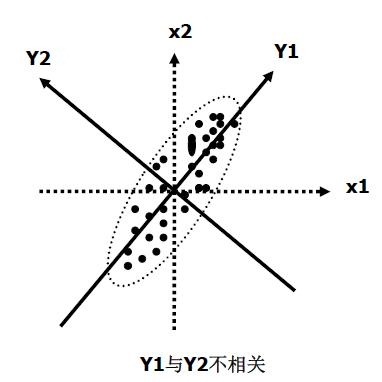

- #### 原理

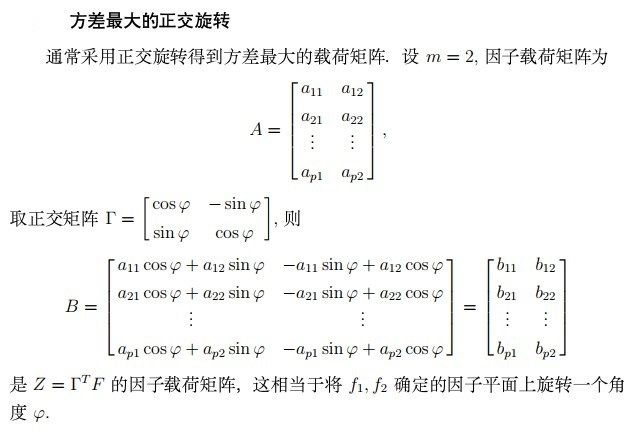

In [22]:
'''
此处使用极大似然法的方差最大旋转
其他方法包括：varimax,quartimax, 
biquartimax, equamax, oblimin,
parsimax,parsimony, biquartimin, promax
注意：上述方法并不全部适合极大似然法估计的因子旋转。
'''
faResultsByML = sm.Factor(n_factor=2,corr=R,method='ml').fit()
faResultsByML.rotate('varimax')
faResultsByML.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Factor analysis results
========================================================
                                                        
--------------------------------------------------------
               Communality                              
--------------------------------------------------------
  var0   var1   var2   var3   var4   var5   var6   var7 
--------------------------------------------------------
 0.9189 0.9251 0.8482 0.8645 0.9183 0.9667 0.9823 0.9135
--------------------------------------------------------
                                                        
--------------------------------------------------------
            Pre-rotated loadings                        
------------------------------------------------------------------------------------------
                                       factor 0                                   factor 1
------------------------------------------------------------------------------------------
var0                                    -0.7304                                     0.6208
var1                                    -0.7914                                     0.5466
var2                                    -0.8545                                     0.3434
var3                                    -0.9156                                     0.1616
var4                                    -0.9579                                     0.0259
var5                                    -0.9726                                    -0.1438
var6                                    -0.9809                                    -0.1419
var7                                    -0.9229                                    -0.2486
--------------------------------------------------------
                                                        
--------------------------------------------------------
            varimax rotated loadings                    
------------------------------------------------------------------------------------------
                                       factor 0                                   factor 1
------------------------------------------------------------------------------------------
var0                                    -0.3006                                     0.9103
var1                                    -0.3912                                     0.8787
var2                                    -0.5509                                     0.7380
var3                                    -0.6977                                     0.6146
var4                                    -0.8044                                     0.5208
var5                                    -0.9053                                     0.3835
var6                                    -0.9114                                     0.3894
var7                                    -0.9174                                     0.2681
========================================================

"""

#### 结果解读
- 无论是主因子法和极大似然法进行因子分析，旋转前的因子载荷矩阵不明晰。载荷矩阵上因子在各观测变量上区分并不明显。


- 旋转后，2个因子在不同观测变量上就出现区分，比如第2个因子在前三个观测变量上载荷更大，在其他观测变量上的载荷相对较小；第1个因子则在后5个观测变量上载荷更大，在其他3个观测变量上的载荷相对较小。因此2个因子的意义就凸显出来了。这就是因子分析的主要作用。



-----------------------------

### 7.2.4 因子得分
-  所谓因子得分就是在因子分析得出公共因子之后，再计算每个样本数据的在各公共因子上的得分。
- 有两种计算因子得分的方法：加权最小二乘法，又称Bartlett因子得分法；回归法，又称Thompson方法。
- Bartlett方法：
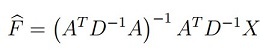
其中$A$是公共因子载荷矩阵；$D$为特殊因子向量；$X$为自变量矩阵。
- 回归法：
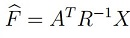 
其中$R$为自变量相关系数矩阵

#### 例4：
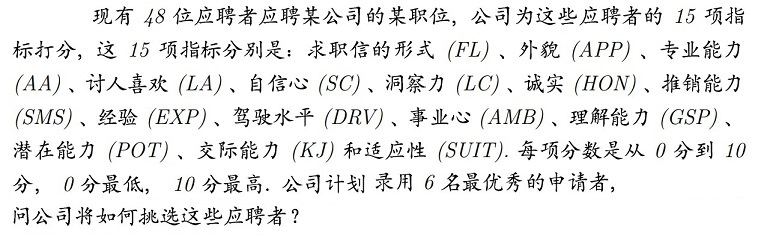

In [23]:
'''
因子分析——因子载荷和因子得分
'''
data = pd.read_csv('e:\\data\\applicant.csv',sep=',')
print('数据形状：',data.shape)
data.head()

数据形状： (48, 15)


,FL,APP,AA,LA,SC,LC,HON,SMS,EXP,DRV,AMB,GSP,POT,KJ,SUIT
0,6,7,2,5,8,7,8,8,3,8,9,7,5,7,10
1,9,10,5,8,10,9,9,10,5,9,9,8,8,8,10
2,7,8,3,6,9,8,9,7,4,9,9,8,6,8,10
3,5,6,8,5,6,5,9,2,8,4,5,8,7,6,5
4,6,8,8,8,4,4,9,5,8,5,5,8,8,7,7


In [24]:
rho = np.corrcoef(data.T)

###注意：如果要计算因子得分，一般需要使用观测变量的原始数据
#用协方差和相关系数矩阵不能计算因子得分
faResults = sm.Factor(endog = data,n_factor=5,method='pa',endog_names=data.columns).fit()
faResults.rotate('varimax')
faResults.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                           Factor analysis results
==============================================================================================================
                                 Eigenvalues                                                                  
--------------------------------------------------------------------------------------------------------------
   FL    APP     AA     LA     SC     LC    HON    SMS    EXP    DRV     AMB     GSP     POT      KJ     SUIT 
--------------------------------------------------------------------------------------------------------------
 7.3644 1.7391 1.2536 0.9516 0.6828 0.1926 0.1328 0.0784 0.0221 0.0102 -0.0250 -0.0563 -0.0929 -0.1242 -0.1420
--------------------------------------------------------------------------------------------------------------
                                                                                                              
--------------------------------------------------------------------------------------------------------------
                                 Communality                                                                  
--------------------------------------------------------------------------------------------------------------
        FL    APP     AA     LA     SC     LC    HON    SMS    EXP    DRV    AMB    GSP    POT     KJ    SUIT 
--------------------------------------------------------------------------------------------------------------
      0.5533 1.0603 0.4795 0.8206 0.8651 0.8145 0.6781 0.8721 0.6758 0.7667 0.8788 0.8471 0.9198 1.0023 0.7576
--------------------------------------------------------------------------------------------------------------
                                                                                                              
--------------------------------------------------------------------------------------------------------------
                              Pre-rotated loadings                                                            
-----------------------------------------------------------------------------------------------------------------------------
                     factor 0                factor 1                factor 2                factor 3                factor 4
-----------------------------------------------------------------------------------------------------------------------------
FL                     0.4215                 -0.5288                  0.2811                  0.0771                  0.1049
APP                    0.5960                  0.0518                 -0.0225                 -0.6008                  0.5839
AA                     0.1023                 -0.2740                 -0.3085                 -0.4343                 -0.3319
LA                     0.6084                  0.1795                  0.5729                 -0.2304                 -0.1920
SC                     0.7911                  0.3502                 -0.3041                  0.1492                  0.0431
LC                     0.8507                  0.1729                 -0.1725                  0.0974                 -0.1471
HON                    0.4206                  0.5295                  0.3319                 -0.2875                 -0.1671
SMS                    0.8829                  0.0266                 -0.2390                  0.1652                  0.0862
EXP                    0.3525                 -0.7321                  0.0953                 -0.0345                 -0.0730
DRV                    0.8450                 -0.0798                 -0.0935                  0.1831                 -0.0635
AMB                    0.8673                  0.0871                 -0.2710                  0.1336                  0.1668
GSP                    0.8992                  0.0217                 -0.1221                 -0.0671                 -0.1

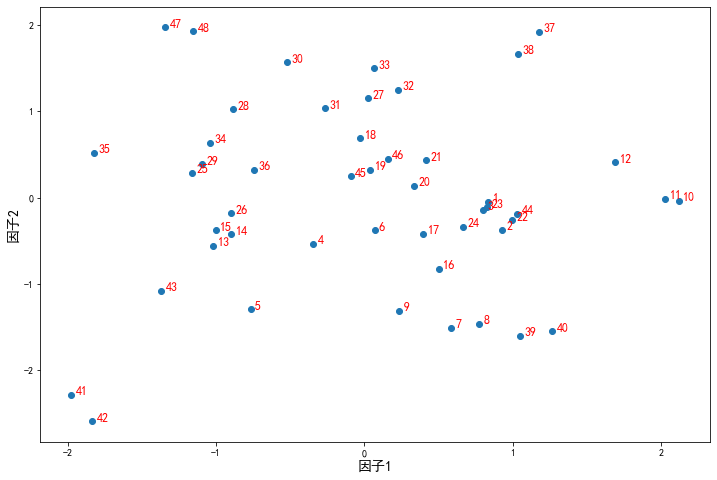

In [25]:
import matplotlib.pyplot as plt

###因子得分，可采用'bartlett'或'regression'方法
scores = faResults.factor_scoring(method='bartlett')
plt.figure(figsize=(12,8))

###画出因子得分散点图
plt.scatter(scores[:,0],scores[:,1])
for i in range(scores.shape[0]):
    plt.text(scores[i,0]+0.03,scores[i,1],i+1,color='red',size=12)
plt.xlabel('因子1',size=14)
plt.ylabel('因子2',size=14)
plt.show()

- ##### 公共因子的划分
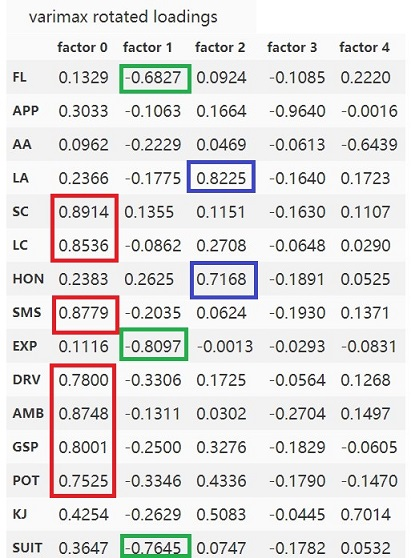

- #### 因子得分计算

In [26]:
###公共因子载荷矩阵
A = faResults.loadings
###特殊因子
D = faResults.uniqueness
###特殊因子^(-1/2)
D1=np.diag(1/D)
###样本数据相关系数矩阵
R=np.corrcoef(data.T)
data1 = np.matrix(data)
###样本数据标准化
X=(data1-np.mean(data1,axis=0))/data1.std(ddof=1,axis=0)

###Bartelett法求因子得分
print('Bartlett法求因子得分：')
print((np.linalg.inv(A.T@D1@A)@A.T@D1@X.T).T)

###回归法求因子得分，2种算法结果稍有区别
print('\n回归法求因子得分：')
print((A.T@np.linalg.inv(R)@X.T).T)

Bartlett法求因子得分：
[[ 0.83460021 -0.04668482 -1.30865092  0.15471503  1.19056477]
 [ 0.92877637 -0.3729842  -0.35155195 -1.25317659  0.76957673]
 [ 0.79892691 -0.13936208 -0.71129772 -0.3137473   1.25631567]
 [-0.34620371 -0.53452239  0.74556143  0.61919893 -0.24191144]
 [-0.76717946 -1.29302096  1.22450748 -0.38041299 -0.15053458]
 [ 0.06791589 -0.37483271  0.30164209  0.12675354 -0.15688421]
 [ 0.58529578 -1.50684345 -0.03875338 -0.63728175  0.37609031]
 [ 0.77277097 -1.45716812  0.06659356 -0.60708808  0.74920705]
 [ 0.23263501 -1.30689408  0.1515596  -0.76671563  0.51799346]
 [ 2.11903124 -0.03557642 -1.60417133  0.43947721 -1.4794412 ]
 [ 2.02888173 -0.01196552 -2.28329377  0.23098133 -1.46362265]
 [ 1.68939024  0.41047063 -0.44997904  0.41324688 -1.88653721]
 [-1.01971448 -0.55983789  1.24944243 -1.01223436 -0.32877508]
 [-0.89603932 -0.42505017  0.96659308 -1.00394031 -0.68309012]
 [-1.00292431 -0.37770369  1.01833996 -0.61366039 -1.14692288]
 [ 0.49963608 -0.82037075 -0.36272916 -

In [27]:
###Factor计算出来的因子得分（bartlett方法）
scores

array([[ 0.83460021, -0.04668482, -1.30865092,  0.15471503,  1.19056477],
       [ 0.92877637, -0.3729842 , -0.35155195, -1.25317659,  0.76957673],
       [ 0.79892691, -0.13936208, -0.71129772, -0.3137473 ,  1.25631567],
       [-0.34620371, -0.53452239,  0.74556143,  0.61919893, -0.24191144],
       [-0.76717946, -1.29302096,  1.22450748, -0.38041299, -0.15053458],
       [ 0.06791589, -0.37483271,  0.30164209,  0.12675354, -0.15688421],
       [ 0.58529578, -1.50684345, -0.03875338, -0.63728175,  0.37609031],
       [ 0.77277097, -1.45716812,  0.06659356, -0.60708808,  0.74920705],
       [ 0.23263501, -1.30689408,  0.1515596 , -0.76671563,  0.51799346],
       [ 2.11903124, -0.03557642, -1.60417133,  0.43947721, -1.4794412 ],
       [ 2.02888173, -0.01196552, -2.28329377,  0.23098133, -1.46362265],
       [ 1.68939024,  0.41047063, -0.44997904,  0.41324688, -1.88653721],
       [-1.01971448, -0.55983789,  1.24944243, -1.01223436, -0.32877508],
       [-0.89603932, -0.42505017,  0.9

#### 结果解读
- 通过公共因子载荷的绝对值判定各个因子的涵义。

- 第1个公共因子，载荷绝对值最大（行数据比较）的变量包括：SC(自信心),LC(洞察力),SMS(推销能力),DRV(驾驶技术),AMB(事业心),GSP(理解能力),POT(潜在能力)等，反应求职者的工作技巧和能力。

- 第2个公共因子绝对值最大的变量包括：FL(求职信形式),EXP(经验),SUIT(适应性)等，反应求职者的工作经验。剩下3个因子各有特定涵义。

- 如果公司招聘外露能力强的工作人员，可以考虑第1个因子得分较高应聘者，比如第10，11号；如果公司招聘有经验者，可以考虑第2个因子得分较高者，比如47,48号应聘者；如果需要招聘二者都具备的应聘者，可以考虑37,38号应聘者。

- #### 因子分析在结构方程的应用
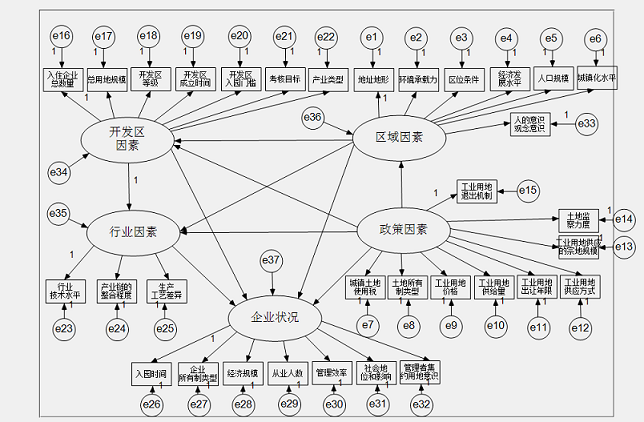

------

## 7.3 典型相关分析
#### 概念与原理
- 概念：典型相关分析（cononical correlation analysis）:用于分析两组随机变量之间的相关性程度的一种统计方法，有效地揭示两组变量之间的相互线性依赖关系。


- 原理：首先求一对线性组合，他们之间有最大相关系数；下一步则从与最初挑选的这对线性组合不相关的线性组合配对中，选出有最大相关系数的一对；以此类推，不断往下迭代。


- 选出的线性组合配对称为典型变量；它们之间的相关系数称为典型相关系数。


- 霍特林提出的例子：数学运算速度、数学运算能力与阅读速度、阅读能力之间关系；原料的主要指标比如硬度、刚度、柔韧性与产品的硬度、刚度、柔韧性之间的关系。

### 7.3.1  典型相关的计算
- #### 数学模型
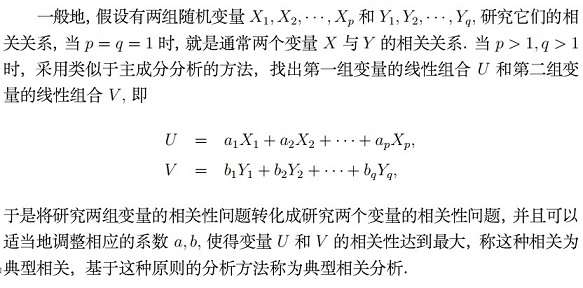

- #### 定义
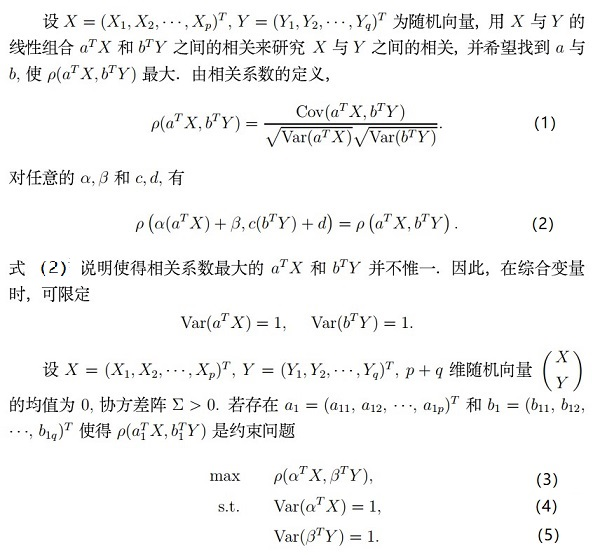

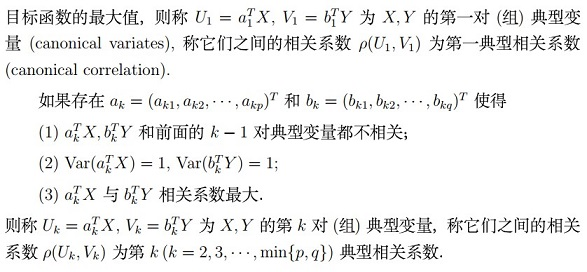

- #### 计算
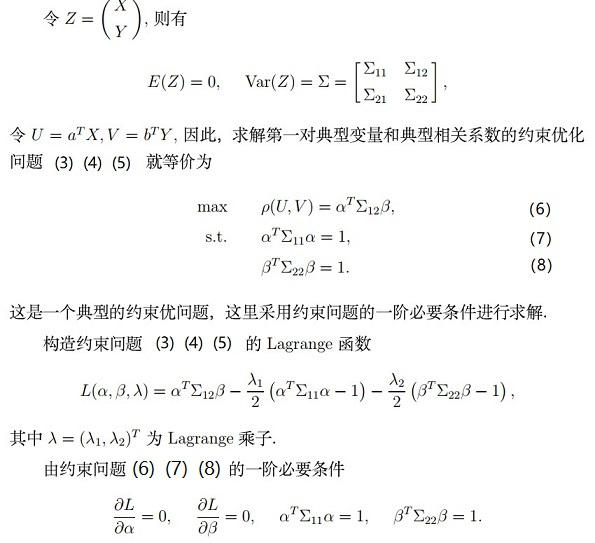
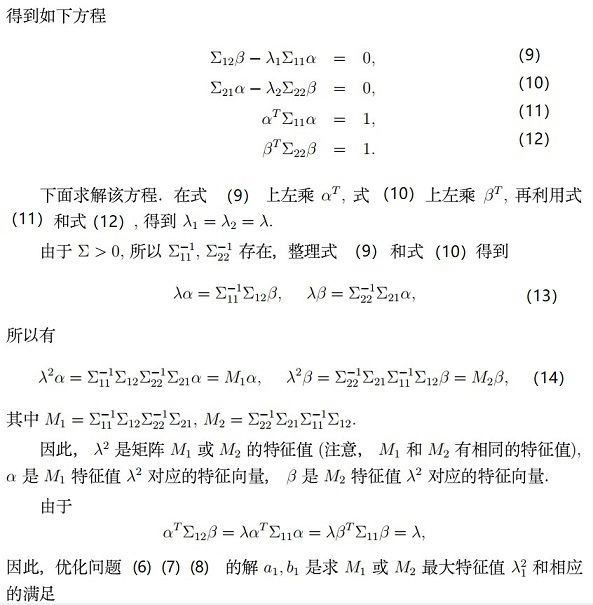
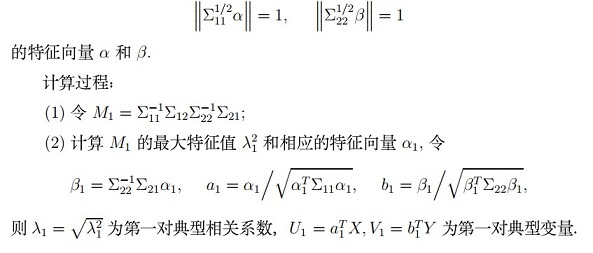



#### 例1：
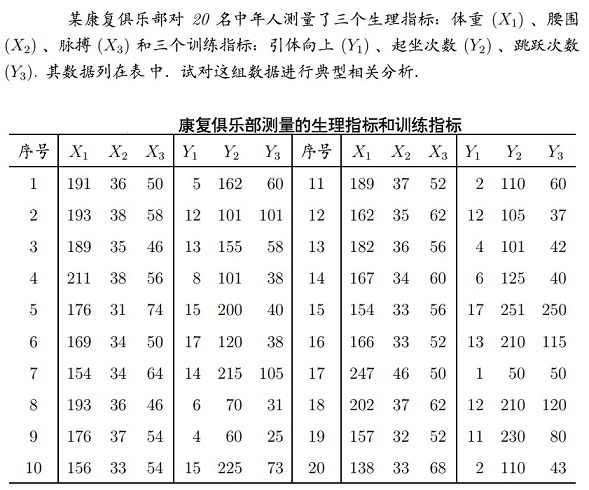

In [28]:
'''
典型相关分析
'''
data = np.array([[191, 193, 189, 211, 176, 169, 154, 193, 176, 156, 189, 
              162, 182, 167, 154, 166, 247, 202, 157, 138], 
             [36, 38, 35, 38, 31, 34, 34, 36, 37, 33, 
              37, 35, 36, 34, 33, 33, 46, 37, 32, 33],
             [50, 58, 46, 56, 74, 50, 64, 46, 54, 54,
              52, 62, 56, 60, 56, 52, 50, 62, 52, 68], 
             [5, 12, 13,  8, 15, 17, 14,  6,  4, 15, 
              2, 12,  4,  6, 17, 13,  1, 12, 11,  2], 
             [162, 101, 155, 101, 200, 120, 215,  70,  60, 225, 
              110, 105, 101, 125, 251, 210,  50, 210, 230, 110], 
             [ 60, 101, 58, 38, 40, 38, 105, 31, 25, 73, 
              60, 37, 42, 40, 250, 115, 50, 120, 80, 43]]).T
###数据标准化
#data_std =data
data_std= (data-data.mean(0))/st.tstd(data,axis=0)
cc = sm.multivariate.CanCorr(data_std[:,3:],data_std[:,0:3])
rs = cc.corr_test()
rs.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Cancorr results
===================================================================
  Canonical Correlation Wilks' lambda Num DF  Den DF F Value Pr > F
-------------------------------------------------------------------
0                0.7956        0.3504 9.0000 34.2229  2.0482 0.0635
1                0.2006        0.9547 4.0000 30.0000  0.1758 0.9491
2                0.0726        0.9947 1.0000 16.0000  0.0847 0.7748
-------------------------------------------------------------------
                                                                   
-------------------------------------------------------------------
Multivariate Statistics and F Approximations                       
---------------------------------------------------------------------
                         Value    Num DF    Den DF   F Value   Pr > F
---------------------------------------------------------------------
Wilks' lambda            0.3504   9.0000   34.2229    2.0482   0.0635
Pillai's trace           0.6785   9.0000   48.0000    1.5587   0.1551
Hotelling-Lawley trace   1.7719   9.0000   19.0526    2.6397   0.0357
Roy's greatest root      1.7247   3.0000   16.0000    9.1986   0.0009
===================================================================

"""

In [125]:
'''
注意：StatsModels的CanCorr类对数据进行中心化转换，而不是标准化转换。
如果直接带入原始数据而不进行标准化，计算结果可能与R不同。
'''
###数据X,Y的系数
cc.x_cancoef,cc.y_cancoef

(array([[-0.17788841, -0.43230348,  0.04381432],
        [ 0.36232695,  0.27085764, -0.11608883],
        [-0.01356309, -0.05301954, -0.24106633]]),
 array([[-0.08018009, -0.08615561,  0.297459  ],
        [-0.2418067 ,  0.02833066, -0.28373986],
        [ 0.16435956,  0.24367781,  0.09608099]]))

- #### 手工计算典型相关系数和对应数据的系数

In [82]:
"""
计算典型相关系数和对应数据的系数（关于数据的典型载荷）
此方法是StatsModels的CanCor类所采用的。
参考此文档：http://numerical.recipes/whp/notes/CanonCorrBySVD.pdf
"""
x = data[:,0:3]
x = (x - x.mean(0))/st.tstd(x,axis=0)

y = data[:,3:6]
y = (y - y.mean(0))/st.tstd(y,axis=0)

ux, sx, vx = np.linalg.svd(x, 0)
vx_ds = vx.T
vx_ds /= sx
###对Y的奇异值分解
uy, sy, vy = np.linalg.svd(y, 0)

vy_ds = vy.T
vy_ds /= sy
u, s, v = np.linalg.svd(ux.T.dot(uy), 0)

x_cancoef = vx_ds.dot(u)
y_cancoef = vy_ds.dot(v.T)
print('典型相关系数：',s)
print('\n数据系数:\n x_cancoef:\n',x_cancoef,'\n y_cancoef:\n',y_cancoef)

典型相关系数： [0.79560815 0.20055604 0.07257029]

数据系数:
 x_cancoef:
 [[-0.17788841 -0.43230348  0.04381432]
 [ 0.36232695  0.27085764 -0.11608883]
 [-0.01356309 -0.05301954 -0.24106633]] 
 y_cancoef:
 [[-0.08018009 -0.08615561  0.297459  ]
 [-0.2418067   0.02833066 -0.28373986]
 [ 0.16435956  0.24367781  0.09608099]]


- #### 上述方法的简化版
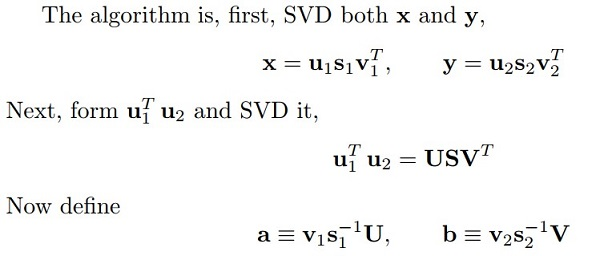

In [112]:
'''
注意svd函数的第二个参数等于0，表示进行的reduced svd，即u和v分解后的形状分别为：(m,k),(k,n),
其中k=min(m,n);
参数等于1，表示进行的full svd，则分解为(m,m),(n,n)。
此处进行的reduced svd。一般情况下都是进行这种分解。
'''
u1,s1,v1=np.linalg.svd(x,0)
u2,s2,v2=np.linalg.svd(y,0)
u,s,v=np.linalg.svd(u1.T@u2)
a=v1.T@np.linalg.inv(np.diag(s1))@u
b=v2.T@np.linalg.inv(np.diag(s2))@v.T
s,a,b

(array([0.79560815, 0.20055604, 0.07257029]),
 array([[-0.17788841, -0.43230348,  0.04381432],
        [ 0.36232695,  0.27085764, -0.11608883],
        [-0.01356309, -0.05301954, -0.24106633]]),
 array([[-0.08018009, -0.08615561,  0.297459  ],
        [-0.2418067 ,  0.02833066, -0.28373986],
        [ 0.16435956,  0.24367781,  0.09608099]]))

- #### 《统计建模与R软件》的计算方式：
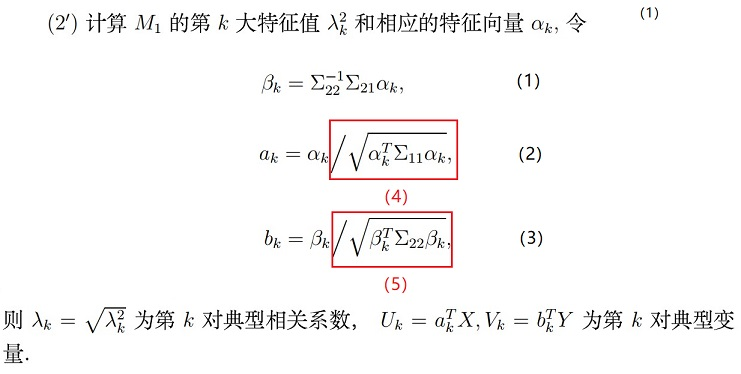

In [31]:
'''
使用《统计建模与R软件》第9.3节p466,p467的公式进行计算。
2种方法计算结果中典型相关系数一致.
二者数据系数是比例关系，此情况在典型相关分析里的结果是等同的。
'''
data_std = (data-data.mean(0))/st.tstd(data,axis=0)
x = data_std[:,0:3]
y = data_std[:,3:6]
Rxx = np.corrcoef(x.T)
Ryy = np.corrcoef(y.T)
Rxy = (np.corrcoef(x.T,y.T)[0:3,3:6])

Ryx = Rxy.T
### M1矩阵的计算，相对比较简单明了
M1=np.linalg.inv(Rxx)@Rxy@np.linalg.inv(Ryy)@Ryx
### 对M1进行特征值分解
eigs,eigv=np.linalg.eig(M1)

### M1矩阵特征值的平方根即典型相关系数
rho=eigs**0.5
print('典型相关系数：',rho)

典型相关系数： [0.79560815 0.20055604 0.07257029]


In [113]:
### 公式(2)的计算
s1 = eigv.T@Rxx@eigv
eig1,eigv1=np.linalg.eigh(s1)
#红框公式(4)的计算，即矩阵s1的-1/2次方
s11=eigv1@np.diag(eig1**(-0.5))@eigv1.T#公式(2)的分母部分
a=eigv@s11 #公式(2)总体计算

###等比例缩放后，数据系数和CanCorr计算结果本质上相同。
r=(a[0,0]/cc.x_cancoef[0,0])
print('按照公式计算的X数据系数：\n',a,
      '\n\n进行等比例缩放后和cc.x_cancoef无实质区别：\n',a/r)

按照公式计算的X数据系数：
 [[ 0.77539761 -1.88436718 -0.19098221]
 [-1.57934657  1.18064108  0.50601948]
 [ 0.05912012 -0.23110682  1.05078377]] 

进行等比例缩放后和cc.x_cancoef无实质区别：
 [[-0.17788841  0.43230348  0.04381432]
 [ 0.36232695 -0.27085764 -0.11608883]
 [-0.01356309  0.05301954 -0.24106633]]


In [33]:
###图中公式(1)的计算
beta=np.linalg.inv(Ryy)@Ryx@eigv

###公式(3)的计算过程
s2 = beta.T@Ryy@beta
eig2,eigv2=np.linalg.eigh(s2)
#红框公式(5)的计算，s2的-1/2次方
s22=eigv2@np.diag(eig2**(-0.5))@eigv2.T
b=beta@s22
r1=b[0,0]/cc.y_cancoef[0,0]
print('按照公式计算的Y数据系数：\n',b,
      '\n\n进行等比例缩放后和cc.y_cancoef无实质区别：\n',b/r1)

按照公式计算的Y数据系数：
 [[ 0.34949692 -0.3755436  -1.29659371]
 [ 1.05401097  0.12349049  1.23679336]
 [-0.71642671  1.06216697 -0.41880732]] 

进行等比例缩放后和cc.y_cancoef无实质区别：
 [[-0.08018009  0.08615561  0.297459  ]
 [-0.2418067  -0.02833066 -0.28373986]
 [ 0.16435956 -0.24367781  0.09608099]]


In [34]:
###公式(4),(5)
st.tvar(x@a),st.tvar(y@b)

(array([1., 1., 1.]), array([1., 1., 1.]))

In [35]:
###公式(11),(12)得以满足
a.T@Rxx@a,b.T@Ryy@b

(array([[ 1.00000000e+00, -1.73222741e-16,  1.19049908e-16],
        [-3.58898650e-16,  1.00000000e+00, -1.06679534e-16],
        [ 1.88515848e-16, -1.87922639e-16,  1.00000000e+00]]),
 array([[ 1.00000000e+00,  2.06367563e-16,  1.27258041e-16],
        [ 2.21932301e-16,  1.00000000e+00,  1.00787991e-16],
        [-1.45873872e-16,  1.24950525e-16,  1.00000000e+00]]))

- #### QR分解与SVD结合计算典型相关系数
来源：http://numerical.recipes/whp/notes/CanonCorrBySVD.pdf
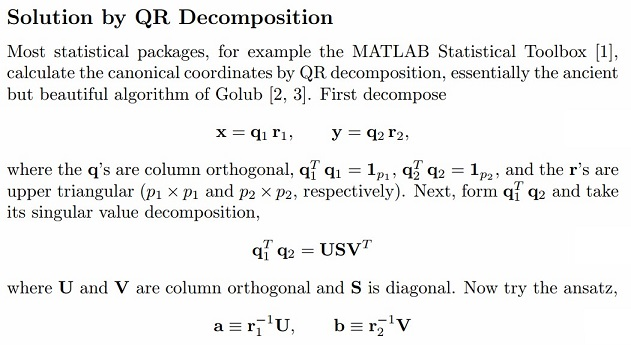

In [98]:
'''
计算结果与Statsmodels的CanCorr计算结果基本一致，
除了系数的最后一列符号刚好相反以外。
与R的cancor函数计算结果完全一致，该函数使用
QR分解与SVD结合进行计算。
'''
q1,r1=np.linalg.qr(x)
q2,r2=np.linalg.qr(y)
Q=q1.T@q2
u,s,v=np.linalg.svd(Q,0)
a=np.linalg.inv(r1)@u
b=np.linalg.inv(r2)@v.T
s,a,b

(array([0.79560815, 0.20055604, 0.07257029]),
 array([[-0.17788841, -0.43230348, -0.04381432],
        [ 0.36232695,  0.27085764,  0.11608883],
        [-0.01356309, -0.05301954,  0.24106633]]),
 array([[-0.08018009, -0.08615561, -0.297459  ],
        [-0.2418067 ,  0.02833066,  0.28373986],
        [ 0.16435956,  0.24367781, -0.09608099]]))

In [122]:
q1,r1

(array([[-0.11521656,  0.11627077, -0.1725206 ],
        [-0.13379988, -0.14178615,  0.12859978],
        [-0.09663324,  0.228885  , -0.32550089],
        [-0.30104972,  0.15366988,  0.10359362],
        [ 0.02415831,  0.59727082,  0.55897294],
        [ 0.08919992,  0.0460432 , -0.24777109],
        [ 0.22857479, -0.20017016,  0.19590324],
        [-0.13379988,  0.14909922, -0.30481635],
        [ 0.02415831, -0.27538527, -0.06068202],
        [ 0.20999147, -0.02189903, -0.15310058],
        [-0.09663324, -0.06200036, -0.09778869],
        [ 0.15424152, -0.21429905,  0.1577002 ],
        [-0.03159164, -0.03145725,  0.01140243],
        [ 0.10778323,  0.01321476,  0.0902286 ],
        [ 0.22857479, -0.05472747, -0.08937281],
        [ 0.11707489,  0.14224321, -0.19746755],
        [-0.63554941, -0.41895951,  0.0730464 ],
        [-0.2174248 ,  0.15138455,  0.27651251],
        [ 0.20069982,  0.13995788, -0.23025259],
        [ 0.37724132, -0.31735506,  0.28331344]]),
 array([[-4.358898

##### StatsModels的计算结果
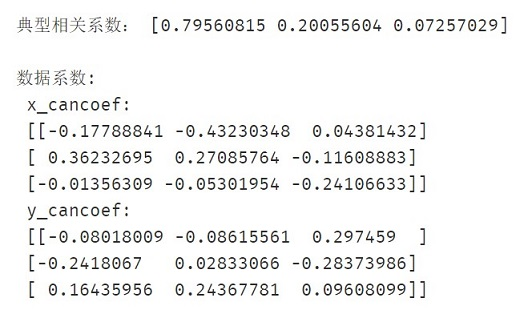

-----------------------------

### 7.3.2 显著性检验
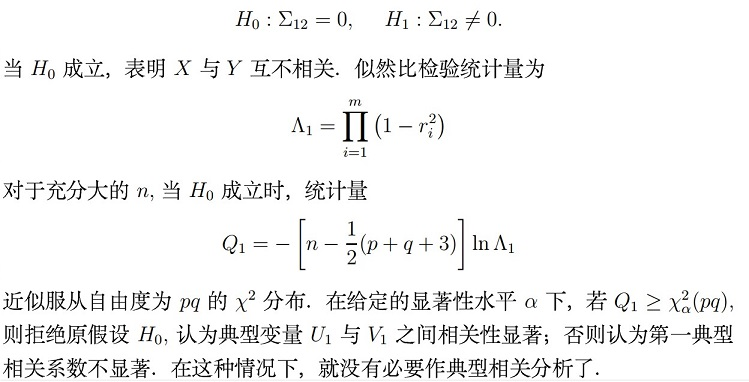

In [66]:
###设显著性水平alpha=0.1
Q1=-(20-(1/2)*(3+3+3))*np.log(np.prod(1-rho**2))
quantile_Q1=st.chi2.ppf(0.1,3*3)
print('Q1:',Q1,', quantile_Q1:',quantile_Q1)
print('Q1 > quantile_Q1,说明至少有一个典型相关系数是显著的。')
###或者计算p值
p_value=st.chi2.sf(Q1,3*3)
print('\npvalue:',p_value)
print('P值小于0.1，也说明至少有一个典型相关系数是显著的。')

Q1: 16.25495752303492 , quantile_Q1: 4.168159008146107
Q1 > quantile_Q1,说明至少有一个典型相关系数是显著的。

pvalue: 0.06174455765531649
P值小于0.1，也说明至少有一个典型相关系数是显著的。


-------------------